## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Convolution2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\pyth

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [3]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [22]:

classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(1024, (3, 3), padding='same',
                      activation='relu',
                      input_shape=(32,32,3)
                     ))     #32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())

classifier.add(Convolution2D(1024, (3, 3), padding='same',
                      activation='relu',
                      ))    #32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(512, (3, 3), padding='same',
                      activation='relu',
                      ))    #32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())
classifier.add(Convolution2D(512, (3, 3), padding='same',
                      activation='relu',
                      ))    #32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(128, (3, 3), padding='same',
                      activation='relu',
                      ))    #32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())
classifier.add(Convolution2D(128, (3, 3), padding='same',
                      activation='relu',
                      ))    #32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))
classifier.add(BatchNormalization())


#flatten
classifier.add(Flatten())
classifier.add(Dense(1024, activation='relu')) #output_dim=100,activation=relu '自己設計FC層參數'
classifier.add(Dropout(0.5))
#輸出
classifier.add(Dense(10, activation='softmax')) #'輸出函數應該用什麼？'

classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 1024)      28672     
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 1024)      4096      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 1024)      9438208   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 1024)      0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 1024)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 1024)      4096      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 512)      

In [23]:
# 載入 Callbacks
from tensorflow.python.keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint("cifar10-1.h5", 
                             monitor="val_accuracy", 
                             save_best_only=True,
                              )
#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#classifier.fit(x_train,y_train,batch_size=100,epochs=100)

history = classifier.fit(x_train, y_train,
                    batch_size=64,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    callbacks=[model_ckpt])
# Collect results
train_loss = classifier.history.history["loss"]
valid_loss = classifier.history.history["val_loss"]
train_acc = classifier.history.history["accuracy"]
valid_acc = classifier.history.history["val_accuracy"]


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 240s 5ms/sample - loss: 1.5355 - accuracy: 0.4775 - val_loss: 1.1307 - val_accuracy: 0.6037
Epoch 2/100
50000/50000 [==============================] - 230s 5ms/sample - loss: 0.9682 - accuracy: 0.6595 - val_loss: 0.8261 - val_accuracy: 0.7158
Epoch 3/100
50000/50000 [==============================] - 231s 5ms/sample - loss: 0.7622 - accuracy: 0.7361 - val_loss: 0.6801 - val_accuracy: 0.7619
Epoch 4/100
50000/50000 [==============================] - 231s 5ms/sample - loss: 0.6353 - accuracy: 0.7810 - val_loss: 0.6206 - val_accuracy: 0.7967
Epoch 5/100
50000/50000 [==============================] - 231s 5ms/sample - loss: 0.5391 - accuracy: 0.8161 - val_loss: 0.5494 - val_accuracy: 0.8196
Epoch 6/100
50000/50000 [==============================] - 230s 5ms/sample - loss: 0.4624 - accuracy: 0.8424 - val_loss: 0.5471 - val_accuracy: 0.8193
Epoch 7/100
50000/50000 [===================

50000/50000 [==============================] - 227s 5ms/sample - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.6299 - val_accuracy: 0.8857
Epoch 55/100
50000/50000 [==============================] - 226s 5ms/sample - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.6557 - val_accuracy: 0.8840
Epoch 56/100
50000/50000 [==============================] - 227s 5ms/sample - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.6159 - val_accuracy: 0.8884
Epoch 57/100
50000/50000 [==============================] - 226s 5ms/sample - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.6740 - val_accuracy: 0.8867
Epoch 58/100
50000/50000 [==============================] - 226s 5ms/sample - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.6196 - val_accuracy: 0.8851
Epoch 59/100
50000/50000 [==============================] - 226s 5ms/sample - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.6832 - val_accuracy: 0.8802
Epoch 60/100
50000/50000 [==============================] - 226s 5ms/sample - loss: 0.0296 - accuracy

In [17]:
# Collect results
train_loss = classifier.history.history["loss"]
valid_loss = classifier.history.history["val_loss"]
train_acc = classifier.history.history["accuracy"]
valid_acc = classifier.history.history["val_accuracy"]

In [24]:
from tensorflow.python import keras
model = keras.models.load_model("cifar10-1.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 15s 2ms/sample - loss: 0.6842 - accuracy: 0.8948


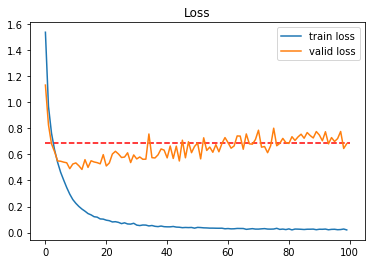

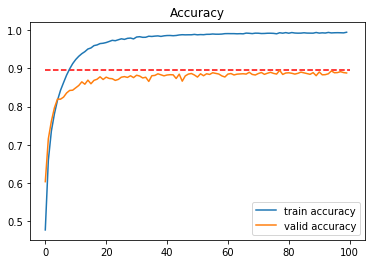

In [25]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [26]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
classifier.predict(input_example)

array([[9.3903794e-04, 3.9745135e-08, 9.1956422e-04, 8.5400110e-01,
        1.3696787e-01, 7.9484751e-05, 2.5481079e-03, 2.9188898e-04,
        4.2497292e-03, 3.1844604e-06]], dtype=float32)